## In class Exercise 5
The purpose of this exercise is to practice different ML algorithms for text classification, text clustering, and model evaluation.

Hint: You might want to use the code demos from previous lectures, where suitable.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight December 6th, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

### Question 1.

The purpose of this question is to practice different machine learning algorithms for text classification, along with performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset (see Canvas) contains two files train data and test data for sentiment analysis in IMDB review, and it has two categories: 1 represents positive and 0 represents negative.

You need to split the training data into training and validation data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model needs to be evaluated on the test data.

Algorithms:
1. MultinominalNB (2 points)
2. SVM (2 points)
3. KNN (2 points)
4. Decision tree (2 points)
5. Random Forest (2 points)
6. XGBoost (2 points)

Evaluation measurement:
1. Accuracy (2 points)
2. Recall (2 points)
3. Precison (2 points)
4. F-1 score (2 points)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Multinomial Naive Bayes**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline

path_to_train = '/content/drive/MyDrive/ProjectClg/stsa-train.csv'
path_to_test = '/content/drive/MyDrive/ProjectClg/stsa-test.csv'

dataset_train = pd.read_csv(path_to_train, header=None, skiprows=1)
dataset_test = pd.read_csv(path_to_test, header=None, skiprows=1)

features_train = dataset_train[1]
targets_train = dataset_train[0].astype(int)
features_test = dataset_test[1]
targets_test = dataset_test[0].astype(int)

# Splitting the data for training and validation
X_train, X_validate, y_train, y_validate = train_test_split(features_train, targets_train, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

cross_val_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation execution
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=cross_val_fold, scoring='accuracy')
cross_val_accuracy = cross_val_scores.mean()

pipeline.fit(X_train, y_train)

predictions_val = pipeline.predict(X_validate)
accuracy_val = accuracy_score(y_validate, predictions_val)
recall_val = recall_score(y_validate, predictions_val)
precision_val = precision_score(y_validate, predictions_val)
f1_val = f1_score(y_validate, predictions_val)

# Test data evaluation
predictions_test = pipeline.predict(features_test)
accuracy_test = accuracy_score(targets_test, predictions_test)
recall_test = recall_score(targets_test, predictions_test)
precision_test = precision_score(targets_test, predictions_test)
f1_test = f1_score(targets_test, predictions_test)

# Results
print(f"Accuracy (Cross-Validation): {cross_val_accuracy*100:.2f}%")
print(f"Accuracy (Validation): {accuracy_val*100:.2f}%")
print(f"Recall (Validation): {recall_val*100:.2f}%")
print(f"Precision (Validation): {precision_val*100:.2f}%")
print(f"F1 Score (Validation): {f1_val*100:.2f}%")
print(f"Accuracy (Test): {accuracy_test*100:.2f}%")
print(f"Recall (Test): {recall_test*100:.2f}%")
print(f"Precision (Test): {precision_test*100:.2f}%")
print(f"F1 Score (Test): {f1_test*100:.2f}%")

Accuracy (Cross-Validation): 77.96%
Accuracy (Validation): 79.34%
Recall (Validation): 89.06%
Precision (Validation): 75.33%
F1 Score (Validation): 81.62%
Accuracy (Test): 80.34%
Recall (Test): 88.89%
Precision (Test): 75.87%
F1 Score (Test): 81.86%


**Support Vector Machine**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline

train_path = '/content/drive/MyDrive/ProjectClg/stsa-train.csv'
test_path = '/content/drive/MyDrive/ProjectClg/stsa-test.csv'
train_df = pd.read_csv(train_path, header=None, skiprows=1)
test_df = pd.read_csv(test_path, header=None, skiprows=1)

X_train_full, y_train_full = train_df[1], train_df[0].astype(int)
X_test, y_test = test_df[1], test_df[0].astype(int)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation for SVM model
svm_cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=strat_kfold, scoring='accuracy')
svm_cv_accuracy = svm_cv_scores.mean()

svm_pipeline.fit(X_train, y_train)

# Predictions for validation and test sets using SVM
val_pred_svm = svm_pipeline.predict(X_val)
test_pred_svm = svm_pipeline.predict(X_test)

svm_val_accuracy = accuracy_score(y_val, val_pred_svm)
svm_val_recall = recall_score(y_val, val_pred_svm)
svm_val_precision = precision_score(y_val, val_pred_svm)
svm_val_f1 = f1_score(y_val, val_pred_svm)
svm_test_accuracy = accuracy_score(y_test, test_pred_svm)
svm_test_recall = recall_score(y_test, test_pred_svm)
svm_test_precision = precision_score(y_test, test_pred_svm)
svm_test_f1 = f1_score(y_test, test_pred_svm)

# Results
print(f"SVM Cross-Validation Accuracy: {svm_cv_accuracy*100:.2f}%")
print(f"SVM Validation Set Accuracy: {svm_val_accuracy*100:.2f}%")
print(f"SVM Recall on Validation Set: {svm_val_recall*100:.2f}%")
print(f"SVM Precision on Validation Set: {svm_val_precision*100:.2f}%")
print(f"SVM F1 Score on Validation Set: {svm_val_f1*100:.2f}%")
print(f"SVM Test Set Accuracy: {svm_test_accuracy*100:.2f}%")
print(f"SVM Recall on Test Set: {svm_test_recall*100:.2f}%")
print(f"SVM Precision on Test Set: {svm_test_precision*100:.2f}%")
print(f"SVM F1 Score on Test Set: {svm_test_f1*100:.2f}%")

SVM Cross-Validation Accuracy: 77.44%
SVM Validation Set Accuracy: 79.77%
SVM Recall on Validation Set: 85.97%
SVM Precision on Validation Set: 77.30%
SVM F1 Score on Validation Set: 81.41%
SVM Test Set Accuracy: 79.90%
SVM Recall on Test Set: 83.94%
SVM Precision on Test Set: 77.62%
SVM F1 Score on Test Set: 80.66%


*   **K nearest neighbour**
*   **Decision Tree Classifier**
*   **Random Forest Classifier**
*   **XG Boost**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
import xgboost as xgb

train_dataset_path = '/content/drive/MyDrive/ProjectClg/stsa-train.csv'
test_dataset_path = '/content/drive/MyDrive/ProjectClg/stsa-test.csv'

training_dataset = pd.read_csv(train_dataset_path, header=None, skiprows=1)
testing_dataset = pd.read_csv(test_dataset_path, header=None, skiprows=1)

features_training, targets_training = training_dataset[1], training_dataset[0].astype(int)
features_testing, targets_testing = testing_dataset[1], testing_dataset[0].astype(int)

# Splitting the training dataset
X_train_set, X_validation_set, y_train_set, y_validation_set = train_test_split(features_training, targets_training, test_size=0.2, random_state=42)

model_classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Model': DecisionTreeClassifier(),
    'Random Forest Model': RandomForestClassifier(),
    'XGBoost Model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, classifier in model_classifiers.items():
    model_pipeline = Pipeline([
        ('tfidf_vectorizer', TfidfVectorizer()),
        ('classifier', classifier)
    ])

    cv_model_scores = cross_val_score(model_pipeline, X_train_set, y_train_set, cv=stratified_kfold, scoring='accuracy')
    mean_cv_accuracy = cv_model_scores.mean()

    model_pipeline.fit(X_train_set, y_train_set)

    predictions_on_validation = model_pipeline.predict(X_validation_set)
    predictions_on_test = model_pipeline.predict(features_testing)

    accuracy_validation = accuracy_score(y_validation_set, predictions_on_validation)
    recall_validation = recall_score(y_validation_set, predictions_on_validation)
    precision_validation = precision_score(y_validation_set, predictions_on_validation)
    f1_score_validation = f1_score(y_validation_set, predictions_on_validation)
    accuracy_test = accuracy_score(targets_testing, predictions_on_test)
    recall_test = recall_score(targets_testing, predictions_on_test)
    precision_test = precision_score(targets_testing, predictions_on_test)
    f1_score_test = f1_score(targets_testing, predictions_on_test)

    # Results
    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy: {mean_cv_accuracy*100:.2f}%")
    print(f"Validation Set - Accuracy: {accuracy_validation*100:.2f}%, Recall: {recall_validation*100:.2f}%, Precision: {precision_validation*100:.2f}%, F1 Score: {f1_score_validation*100:.2f}%")
    print(f"Test Set - Accuracy: {accuracy_test*100:.2f}%, Recall: {recall_test*100:.2f}%, Precision: {precision_test*100:.2f}%, F1 Score: {f1_score_test*100:.2f}%")
    print("-------------------------------------------------------------------")

Model: K-Nearest Neighbors
Cross-Validation Accuracy: 71.57%
Validation Set - Accuracy: 72.98%, Recall: 77.84%, Precision: 71.98%, F1 Score: 74.80%
Test Set - Accuracy: 73.15%, Recall: 78.22%, Precision: 70.96%, F1 Score: 74.41%
-------------------------------------------------------------------
Model: Decision Tree Model
Cross-Validation Accuracy: 60.55%
Validation Set - Accuracy: 61.92%, Recall: 68.44%, Precision: 61.77%, F1 Score: 64.94%
Test Set - Accuracy: 62.27%, Recall: 67.44%, Precision: 61.06%, F1 Score: 64.09%
-------------------------------------------------------------------
Model: Random Forest Model
Cross-Validation Accuracy: 71.01%
Validation Set - Accuracy: 71.68%, Recall: 78.12%, Precision: 70.24%, F1 Score: 73.97%
Test Set - Accuracy: 72.21%, Recall: 77.67%, Precision: 69.97%, F1 Score: 73.62%
-------------------------------------------------------------------
Model: XGBoost Model
Cross-Validation Accuracy: 69.33%
Validation Set - Accuracy: 71.46%, Recall: 82.05%, Pre

### Question 2.

The purpose of the question is to practice different machine learning algorithms for text clustering.

Please downlad the dataset by using the following link: https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

Apply the listed clustering methods to the dataset:
1. K-means (4 points)
2. DBSCAN (4 points)
3. Hierarchical clustering (4 points)
4. Word2Vec (4 points)
5. BERT (4 points)

In [ ]:
!pip install gensim
!pip install transformers

**K-Mean Text clustering**

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ProjectClg/Amazon_Unlocked_Mobile.csv'

amazon_data = pd.read_csv(file_path)

subset_data = amazon_data['Reviews'].dropna().sample(n=5000, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(subset_data)

# KMeans Clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Output
cluster_labels = kmeans.labels_
subset_data_with_labels = pd.DataFrame({'Reviews': subset_data, 'Cluster Labels': cluster_labels})
print(subset_data_with_labels.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                  Reviews  Cluster Labels
384572  Made a good replacement for my older version. ...               1
266581  Bought the unit primarily as a camera that als...               1
36373   Great phone.Amazon has the best customer servi...               1
213043  the phone is in great condition physicly. the ...               1
83820   Very reliable. Good easy phone to use. Not ful...               1


**DBSCAN**

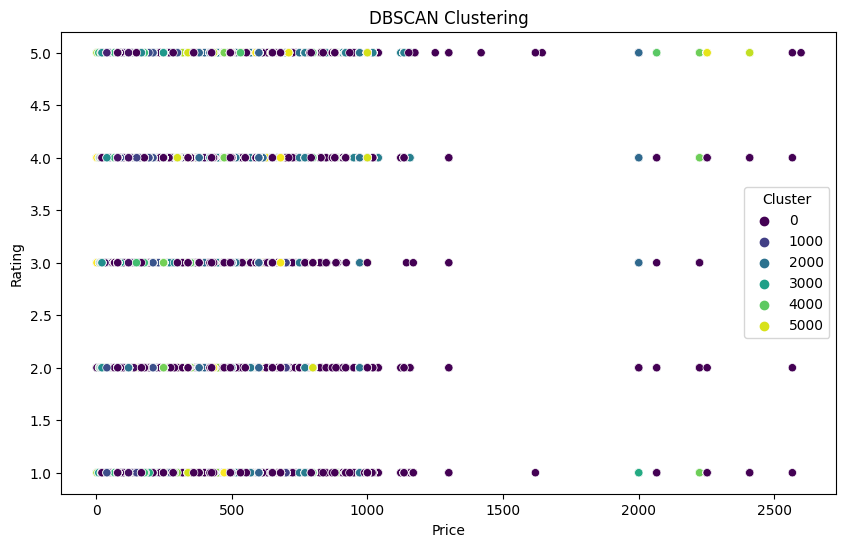

In [11]:
# DBSCAN
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = '/content/drive/MyDrive/ProjectClg/Amazon_Unlocked_Mobile.csv'
data = pd.read_csv(file_path)
numerical_data = data[['Price', 'Rating', 'Review Votes']].dropna()

# DBSCAN model
dbscan = DBSCAN(eps=0.4, min_samples=6)
clusters = dbscan.fit_predict(numerical_data)

numerical_data['Cluster'] = clusters

# Output
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numerical_data, x='Price', y='Rating', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

**Hierarchial Text Clustering**

In [12]:
# Hierarchial Text Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward

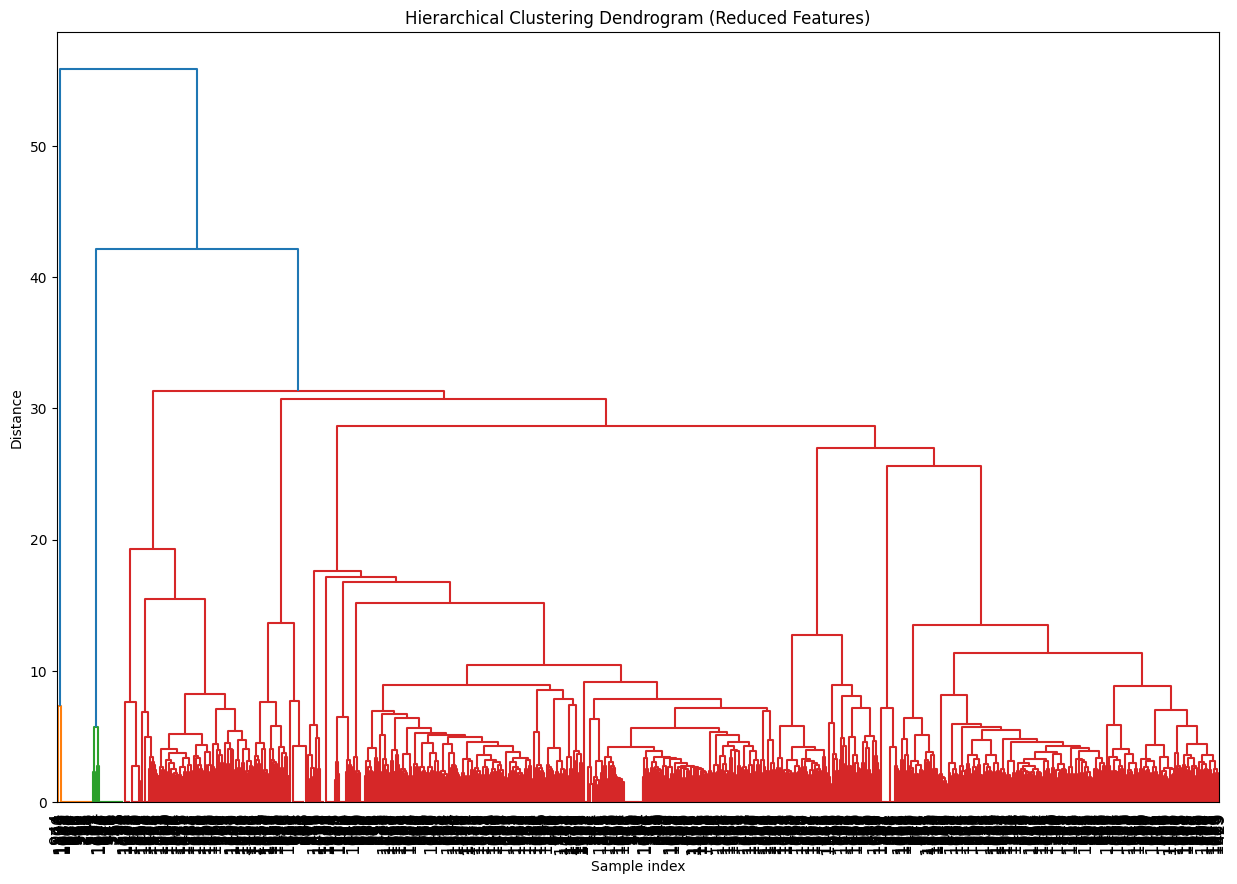

In [13]:
new_file_path = '/content/drive/MyDrive/ProjectClg/Amazon_Unlocked_Mobile.csv'
new_data = pd.read_csv(new_file_path)

new_data_subset = new_data['Reviews'].dropna().sample(n=1200, random_state=50)

new_tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=800)
new_X_tfidf = new_tfidf_vectorizer.fit_transform(new_data_subset)

# Creating Hierarchial Model i.e Ward
new_cos_similarity = cosine_similarity(new_X_tfidf)
new_linkage_matrix = ward(new_cos_similarity)

# Plotting the dendrogram with reduced features
plt.figure(figsize=(15, 10))
dendrogram(new_linkage_matrix, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Reduced Features)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


**Word2vec Text Clustering**

In [ ]:
!pip install gensim scikit-learn

In [ ]:
# Word2vec Text Clustering
import pandas as pd
import gensim
from sklearn.cluster import KMeans
import numpy as np
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

In [16]:
new_data = pd.read_csv('/content/drive/MyDrive/ProjectClg/Amazon_Unlocked_Mobile.csv')

new_data = new_data.dropna(subset=['Reviews'])
new_data['Processed_Reviews'] = new_data['Reviews'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))
new_stop_words = set(stopwords.words('english'))
new_data['Processed_Reviews'] = new_data['Processed_Reviews'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in new_stop_words]))

new_sample_data = new_data.sample(n=1500, random_state=60)['Processed_Reviews']

# Creating Word2vec model
new_word2vec_model = gensim.models.Word2Vec(new_sample_data.apply(word_tokenize), vector_size=120, window=8, min_count=3)

def get_new_vector(sentence):
    words = word_tokenize(sentence)
    word_vectors = [new_word2vec_model.wv[word] for word in words if word in new_word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(new_word2vec_model.vector_size)
    return np.mean(word_vectors, axis=0)

new_sentence_vectors = new_sample_data.apply(get_new_vector)

new_kmeans = KMeans(n_clusters=8, random_state=75)
new_kmeans.fit(list(new_sentence_vectors))

new_sample_data = new_sample_data.to_frame()
new_sample_data['Cluster_Labels'] = new_kmeans.labels_

print(new_sample_data.head())


                                        Processed_Reviews  Cluster_Labels
298293  months hold charge ive contacted seller respon...               7
27596                          love phone best thing ever               1
314122                               good little computer               3
303664  love 2014 edition cheaper 2015 edition added 6...               0
136525  single mother 3 money waste came amazon trusti...               7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Bert Text Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


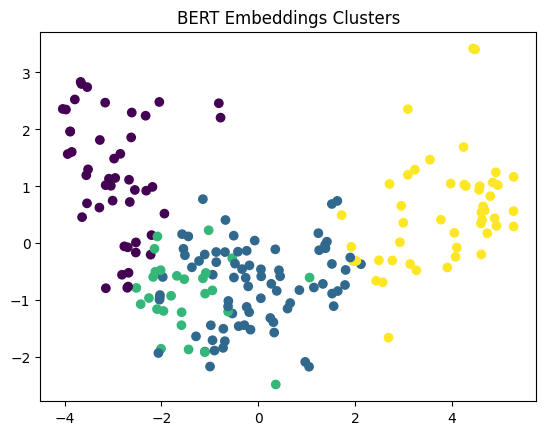

In [3]:
# Bert Model
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/ProjectClg/Amazon_Unlocked_Mobile.csv')

data_subset = data['Reviews'].dropna().sample(n=200, random_state=42)

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def create_embeddings_batch(texts, batch_size=8):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        inputs = tokenizer(texts[i:i+batch_size].tolist(), return_tensors="pt", truncation=True, max_length=512, padding=True)
        outputs = model(**inputs)
        embeddings.extend(outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy())
    return embeddings

batch_size = 8
embeddings = create_embeddings_batch(data_subset, batch_size=batch_size)

embeddings_np = torch.tensor(embeddings)

n_clusters = 4
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embeddings_np)

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_np)
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('BERT Embeddings Clusters')
plt.show()


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

**ANS:**

On a dataset of Amazon product evaluations, contrasting the outcomes of several clustering techniques such as K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT provides interesting comparisons. The centroid-based approach K-means yields distinct cluster divisions but is dependent on pre-established cluster numbers and may not work well with non-spherical forms. Because it is density-based, DBSCAN can handle clusters of any shape and is excellent at spotting outliers; however, the density parameter values have a significant impact on the system's performance. Although it doesn't require the number of clusters in advance, hierarchical clustering, which produces a tree of clusters, is excellent for visual comprehension but can be computationally demanding for large datasets. Word2Vec can identify semantic similarities in text data and provide a sophisticated categorization based on word embeddings when combined with a clustering technique such as K-means. However, it may miss context. Though it has a high processing cost and complexity, BERT's deep contextual embeddings allow for sophisticated text understanding that may result in more meaningful clusters in complex textual data.

In my opinion I prefer Bert model when compared to other as we can train the model accordingly but the only drawback is its trainging time as well as setting the values to hyper-parameters.

Thus for this experiment Bert model provided better results compared to other text clustering algorithms like K-Means, DBSCAN, Hierarchical clustering and Word2Vec on the Amazon_Unlocked_Mobile.csv dataset.

In [ ]:
#You can write you answer here. (No code needed)


